# http://karpov.courses

# Midterm project: e-commerce

## Data description
### olist_customers_datase.csv - table with information about customers
* customer_id - customer identifier in the system.
* customer_unique_id - unique identifier of the customer (analog of passport number).
* customer_zip_code_prefix - customer's zip code.
* customer_city - customer's delivery city.
* customer_state - customer's delivery state.
### olist_orders_dataset.csv - table with information about orders
* order_id - unique order identifier (check number).
* customer_id - customer identifier in the system.
* order_status - order status; one of _**created, approved, invoiced, processing, shipped, delivered, unavailable, canceled**_.
* order_purchase_timestamp - order generation time.
* order_approved_at - time of order payment confirmation.
* order_delivered_carrier_date - time of order transfer to the logistics service.
* order_delivered_customer_date - time of order delivery.
* order_estimated_delivery_date - declared delivery date.
### olist_order_items_dataset.csv - table with information about products included in orders
* order_id - unique order identifier (check number).
* order_item_id - product identifier within one order.
* product_id - product id (barcode analog).
* seller_id - product manufacturer's ID.
* shipping_limit_date - latest date of delivery by the seller for transferring the order to the logistics partner.
* price - price per unit.
* freight_value - weight of the product.

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests

## Reading data

In [4]:
api_url = r'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
customers_url = r'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
orders_url = r'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
items_url = r'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

### Customers

In [5]:
# Get the download link
response = requests.get(api_url, params={'public_key': customers_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/52cbce3e666a4675286beb83f3a0a0ddb69177cc03ad3ee13f68925f00fec589/657afa73/l9rUW5QCYE1v_Vb85lc2_FJfwWdgMJ5VjRECL1sslDo-ICZm75VRCKxmbjQzyPRm81ySmP0WwqOBn9lSniY-Lg%3D%3D?uid=0&filename=olist_customers_dataset.csv&disposition=attachment&hash=s4lUpgJ0SPJ1ON4cVah4tVvdiHo%2B%2B3rzOaw5q4yyC8iBoMstcdyRfe0vbQs5cbwxq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=9033957&hid=b675f8ba78c13d600facc03ba2033f9f&media_type=spreadsheet&tknv=v2


In [6]:
# Load data directily into pd DataFrame
customers_df = pd.read_csv(response.json()['href'])
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
# Are there missing values?
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Orders

In [8]:
# Get the download link
response = requests.get(api_url, params={'public_key': orders_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/57e67afbcfc54bb6bfad4bd8b0e17b479592d820f919e4b1946543c62ec6c789/657afa79/l9rUW5QCYE1v_Vb85lc2_FMCwvSWHpAnIgUxRQB6t1NE-kaLb2q1lfdqmkuuvbZRx6gQSQCHgBk324u3rpDj0Q%3D%3D?uid=0&filename=olist_orders_dataset.csv&disposition=attachment&hash=Oyo0QHlCDI8w3ue9MPByRJBzEgLum/ZNMmXWTNQWXG8TQs6QIMnsobdGPfplDa90q/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=17654914&hid=87c93f55b161ccff733960c7e368d4e8&media_type=spreadsheet&tknv=v2


In [9]:
# Load data directily into pd DataFrame
orders_df = pd.read_csv(response.json()['href'])
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Are there missing values?
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
# Let's count them
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Items

In [12]:
# Get the download link
response = requests.get(api_url, params={'public_key': items_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/ad8cd9829e952d2cc96a1119883755d7948bd9ed6a0309ac773f8a8eb20e907a/657afa89/l9rUW5QCYE1v_Vb85lc2_BLqOxxhJrJbn52AF-XmD50NEbdTd8gXMRrqNXCXacfnpPZo6WuHinNd24yXhjMTJQ%3D%3D?uid=0&filename=olist_order_items_dataset.csv&disposition=attachment&hash=GOrR6hhegX%2B1xKqOtZgmA%2BI90i%2BAiYjmpnekGChzcjuNJpvFd6XAN2bd9pLlim9cq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=15438671&hid=86fa0ab2956a1f56a0c01e930a44f547&media_type=spreadsheet&tknv=v2


In [13]:
# Load data directily into pd DataFrame
items_df = pd.read_csv(response.json()['href'])
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
# Are there missing values?
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
# Clean-up
del api_url, customers_url, items_url, orders_url 

## Task 1
How many users made only one purchase?

In [14]:
# There are customer_unique_id that correspond to more than one customer_id.
print('\ncustomers_df:')
print(customers_df[['customer_id', 'customer_unique_id']].nunique())


customers_df:
customer_id           99441
customer_unique_id    96096
dtype: int64


What I would consider a successful purchase:
* order_status - delivered
* order_approved_at is not **NaN** (there is information about order payment)
* order_delivered_customer_date not **NaN** (there is information about order delivery)

In [15]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Merging filtered_orders_df with customers_df and selecting only the required columns.

In [16]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df, how="inner", on="customer_id"
)[["customer_id", "customer_unique_id"]]
merged_df.head()

,customer_id,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


Search for those customer_unique_ids that match exactly 1 customer_id (that is, given the above code, look for people who have made exactly 1 successful purchase).

In [17]:
final_df = merged_df.groupby(by='customer_unique_id', as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id': 'N'}) \
    .query('N==1')
final_df.head()

,customer_unique_id,N
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [18]:
print('The number of customers who have made exactly one successful purchase is',
      final_df.shape[0])

The number of customers who have made exactly one successful purchase is 90537


In [19]:
# Clean-up
del filtered_orders_df, final_df, merged_df 

## Task 2
How many orders per month on average are not delivered for various reasons? Display information about these reasons.

I will consider all orders that don't have a **"delivered"** status. 
The **order_purchase_timestamp** column (of **orders_df**) containing creation dates of orders will be used as a basis for averaging orders by months.

In [20]:
filtered_orders_df = orders_df.query('order_status!="delivered"')[
    ["order_id", "order_status", "order_purchase_timestamp"]
]
filtered_orders_df.info()  # no NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 2963 entries, 6 to 99415
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  2963 non-null   object
 1   order_status              2963 non-null   object
 2   order_purchase_timestamp  2963 non-null   object
dtypes: object(3)
memory usage: 92.6+ KB


Need to convert order_purchase_timestamp to datetime and extract dates as strings in year / month format.

In [21]:
filtered_orders_df["order_purchase_timestamp"] = pd.to_datetime(
    filtered_orders_df["order_purchase_timestamp"]
)
filtered_orders_df["year_month"] = filtered_orders_df[
    "order_purchase_timestamp"
].dt.strftime("%Y/%m")

Checking the result.

In [22]:
filtered_orders_df.head()

,order_id,order_status,order_purchase_timestamp,year_month
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017/04
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018/06
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018/08
128,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017/09
154,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018/01


In [23]:
filtered_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2963 entries, 6 to 99415
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  2963 non-null   object        
 1   order_status              2963 non-null   object        
 2   order_purchase_timestamp  2963 non-null   datetime64[ns]
 3   year_month                2963 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 115.7+ KB


Next, I count the number of orders with different statuses that were created in a given month. For convenience and clarity, the result was reshaped using the pivot function. 
Since NaN in this table is equal to 0 and mean values will be considered in the following cells, the fillna function was applied.

In [24]:
date_status_n = (
    filtered_orders_df.groupby(by=["year_month", "order_status"], as_index=False)
    .agg({"order_id": "count"})
    .rename(columns={"order_id": "n"})
    .pivot(columns='order_status', index='year_month', values='n')
    .fillna(value=0,)
    .sort_index()
)
date_status_n.columns.name = 'occurrences'
date_status_n.head()

occurrences,approved,canceled,created,invoiced,processing,shipped,unavailable
year_month,,,,,,,
2016/09,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2016/10,0.0,24.0,0.0,18.0,2.0,8.0,7.0
2017/01,0.0,3.0,0.0,12.0,9.0,16.0,10.0
2017/02,1.0,17.0,0.0,11.0,32.0,21.0,45.0
2017/03,0.0,33.0,0.0,3.0,23.0,45.0,32.0


In [25]:
# Total number of orders per month
date_status_n['total'] = date_status_n.sum(axis=1)
date_status_n.head()

occurrences,approved,canceled,created,invoiced,processing,shipped,unavailable,total
year_month,,,,,,,,
2016/09,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
2016/10,0.0,24.0,0.0,18.0,2.0,8.0,7.0,59.0
2017/01,0.0,3.0,0.0,12.0,9.0,16.0,10.0,50.0
2017/02,1.0,17.0,0.0,11.0,32.0,21.0,45.0,127.0
2017/03,0.0,33.0,0.0,3.0,23.0,45.0,32.0,136.0


First, let's visualize the number of unsuccessful orders for all months of observations. 

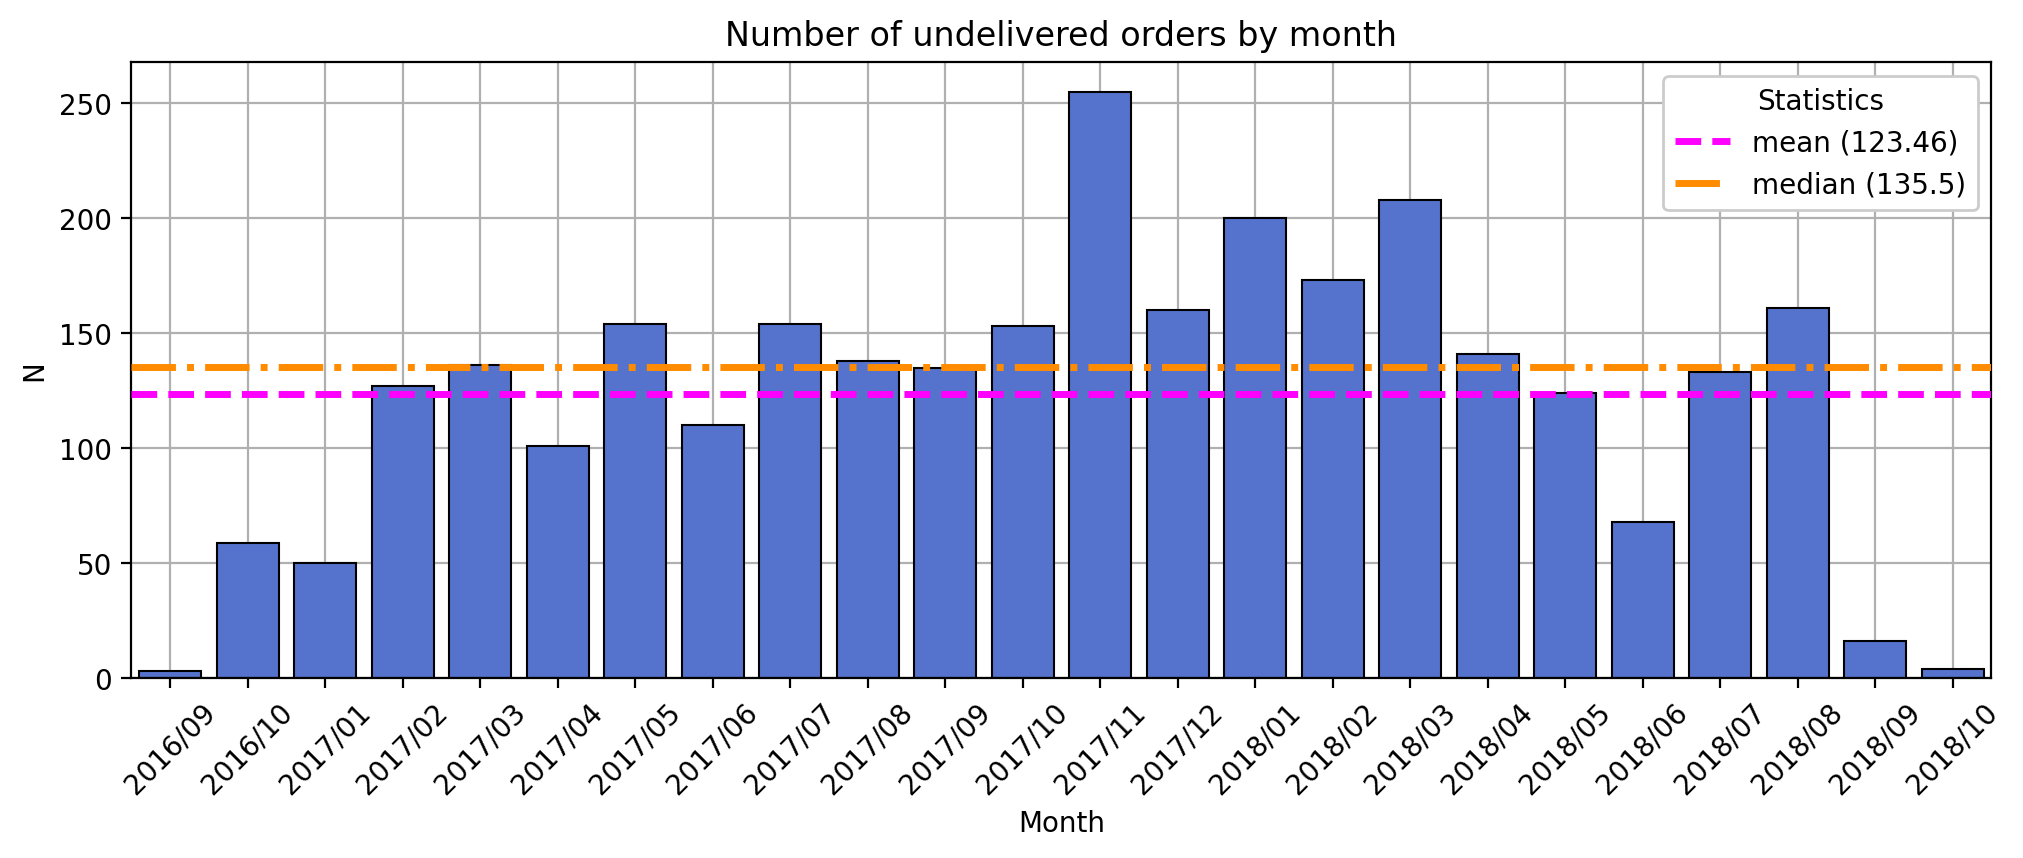

In [26]:
fig, ax = plt.subplots(dpi=200, figsize=(12, 4))
ax.axhline(date_status_n['total'].mean(), zorder=3,
           linestyle='--', linewidth=2.5, color='magenta', 
           label=f"mean ({np.round(date_status_n['total'].mean(), 2)})")
ax.axhline(date_status_n['total'].median(), zorder=3,
           linestyle='-.', linewidth=2.5, color='darkorange',
           label=f"median ({np.round(date_status_n['total'].median(), 2)})")
sns.barplot(data=date_status_n, x=date_status_n.index, y='total',
            color="royalblue", edgecolor='black', linewidth=.75,
            ax=ax, zorder=2)
ax.set(xlabel='Month', ylabel='N', title='Number of undelivered orders by month')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Statistics', framealpha=1)
ax.grid(zorder=1)
plt.show();

Now visualize monthly mean of undelivered orders with various statuses.

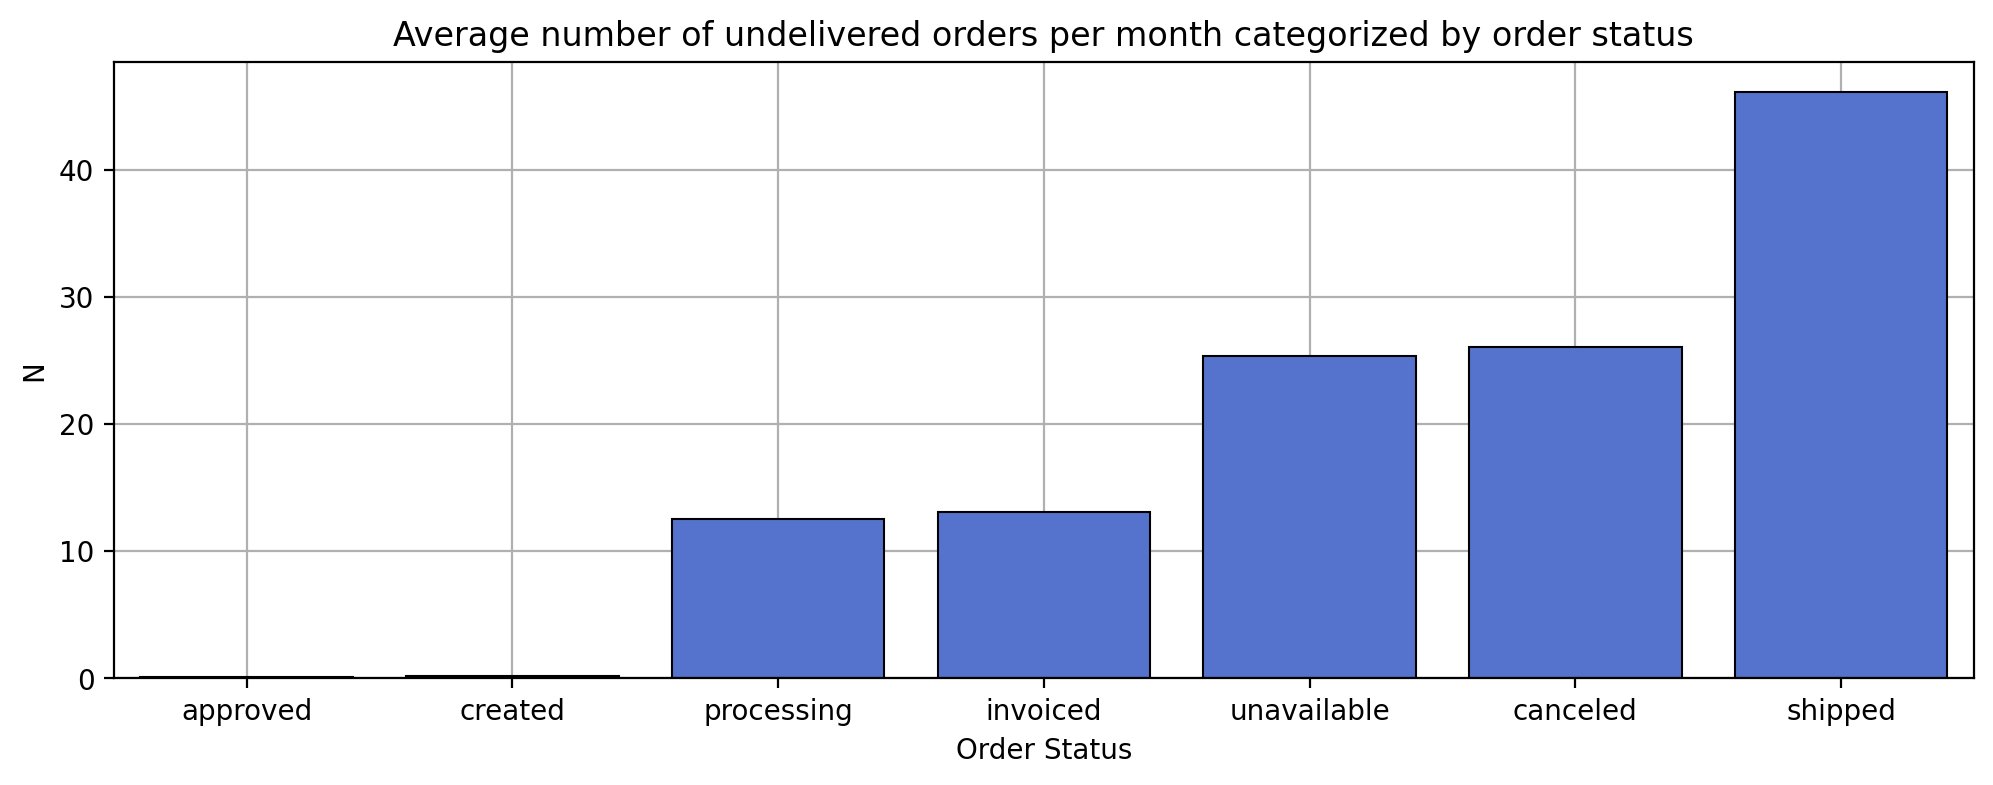

In [27]:
mean_series = date_status_n.iloc[:, :-1].mean().sort_values()

fig, ax = plt.subplots(dpi=200, figsize=(12, 4))
sns.barplot(x=mean_series.index, y=mean_series,
            color="royalblue", edgecolor='black', linewidth=.75,
            ax=ax, zorder=2)
ax.set(xlabel='Order Status', ylabel='N',
       title='Average number of undelivered orders per month categorized by order status')
ax.grid(zorder=1)
plt.show();

In [28]:
# Clean-up
del date_status_n, filtered_orders_df

## Task 3
Identify which day of the week each product is bought most often.

As in the first task, let's assume that a purchase is successful if:
* order_status - delivered
* order_approved_at is not **NaN** (there is information about order payment)
* order_delivered_customer_date not **NaN** (there is information about order delivery)

In [16]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Merge the table with successful orders with the table containing information about the items in each order. Select only relevant columns.

In [17]:
merged_df=pd.merge(left=filtered_orders_df, right=items_df, how='inner',
         on='order_id')[['order_id', 'order_purchase_timestamp', 'product_id']]

Checking the result. 

In [18]:
merged_df.tail()

,order_id,order_purchase_timestamp,product_id
110169,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923
110170,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad
110171,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4
110172,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4
110173,66dea50a8b16d9b4dee7af250b4be1a5,2018-03-08 20:57:30,006619bbed68b000c8ba3f8725d5409e


In [173]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110174 entries, 0 to 110173
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   order_id                  110174 non-null  object
 1   order_purchase_timestamp  110174 non-null  object
 2   product_id                110174 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


Extract the day of the week from the order_purchase_timestamp column, save the result to weekday. Discard the order_purchase_timestamp column.

In [19]:
merged_df['weekday'] = pd.to_datetime(merged_df.order_purchase_timestamp) \
    .dt.strftime('%A')
merged_df.drop(columns='order_purchase_timestamp', inplace=True)
merged_df.head()

,order_id,product_id,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


Calculating the number of products purchases by day of the week and checking the resulting table.

In [23]:
temp = merged_df.groupby(by=['product_id', 'weekday']).agg({'order_id':'count'}) \
    .rename(columns={'order_id':'purchases'})
temp.head(10)

purchases
product_id                       weekday             
00066f42aeeb9f3007548bb9d3f33c38 Sunday             1
00088930e925c41fd95ebfe695fd2655 Tuesday            1
0009406fd7479715e4bef61dd91f2462 Thursday           1
000b8f95fcb9e0096488278317764d19 Friday             1
                                 Wednesday          1
000d9be29b5207b54e86aa1b1ac54872 Tuesday            1
0011c512eb256aa0dbbb544d8dffcf6e Thursday           1
00126f27c813603687e6ce486d909d01 Sunday             2
001795ec6f1b187d37335e1c4704762e Monday             2
                                 Saturday           3

In [24]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 59940 entries, ('00066f42aeeb9f3007548bb9d3f33c38', 'Sunday') to ('fffe9eeff12fcbd74a2f2b007dde0c58', 'Wednesday')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   purchases  59940 non-null  int64
dtypes: int64(1)
memory usage: 895.7+ KB


Selecting for each product the day of the week with the maximum number of purchases (if the product was bought every day the same number of times, the first appearance is selected).

In [26]:
final_df = temp.loc[temp.groupby(level=0)['purchases'].idxmax()] \
    .sort_values(by='purchases', ascending=False)
final_df.head(10)

,,purchases
product_id,weekday,
422879e10f46682990de24d770e7f83d,Wednesday,93
99a4788cb24856965c36a24e339b6058,Monday,91
aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
368c6c730842d78016ad823897a372db,Friday,67
389d119b48cf3043d311335e499d9c6b,Thursday,67
53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
d1c427060a0f73f6b889a5c7c61f2ac4,Monday,62
3dd2a17168ec895c781a9191c1e95ad7,Wednesday,53


Sanity checks:
* each product_id corresponds to one value from the purchases column.
* the final_df table is smaller than all previous tables.

In [184]:
final_df.reset_index().nunique()

product_id    32211
weekday           7
order_id         50
dtype: int64

In [185]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32211 entries, ('422879e10f46682990de24d770e7f83d', 'Wednesday') to ('fffe9eeff12fcbd74a2f2b007dde0c58', 'Wednesday')
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   order_id  32211 non-null  int64
dtypes: int64(1)
memory usage: 597.8+ KB


In [27]:
# Clean-up
del filtered_orders_df, final_df, merged_df, temp 